# We will replace Distance (that was calculated manualy) with Geodesic distance that geopy calculated

In [25]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn.feature_selection import f_regression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv("Thessaloniki_classification.csv")

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df.columns

Index(['Gender', 'Driver_licence', 'Truck_licence', 'Motor_licence',
       'Car_access', 'Bike_access', 'Skate_access', 'Motor_access', 'Hsize',
       'Vehicles', 'Mode', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

In [5]:
drops = [ 'Driver_licence','Motor_licence',
       'Car_access','Motor_access',
       'Vehicles', 'Mode',
       'Distance']
X = df.drop(drops, axis=1)
y = df["Mode"]

In [6]:
drops = ['Driver_licence', 'Motor_licence',
       'Car_access', 'Motor_access',
       'Vehicles', 'Mode',
       'Distance', 'Age_21 - 30', 'Age_31 -40','Age_20 και κάτω', 'Age_41 - 50', 'Age_51 και άνω',
       'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']
X1 = df.drop(drops, axis=1)
y1 = df["Mode"]

In [7]:
X.columns

Index(['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Geodesic_distance', 'Age_20 και κάτω',
       'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

In [8]:
X1.columns

Index(['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Geodesic_distance'],
      dtype='object')

In [9]:
X

,Gender,Truck_licence,Bike_access,Skate_access,Hsize,Time,Convenience,Cost,Safety,Environment,...,Age_41 - 50,Age_51 και άνω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_other
0,0,0,0,0,4,60,1,3,2,4,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,3,40,4,4,4,2,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,3,35,4,5,3,2,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,4,6,5,3,3,3,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,3,46,5,5,5,2,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,0,0,0,4,18,5,3,5,3,...,0,0,0,1,0,0,0,0,1,0
369,1,0,0,0,1,60,3,5,3,5,...,1,0,0,0,0,1,0,1,0,0
370,0,0,1,1,3,44,4,3,3,4,...,0,0,0,0,0,1,1,0,0,0
371,1,0,0,0,3,18,4,5,3,4,...,0,0,0,0,0,1,0,0,1,0


In [10]:
X1

,Gender,Truck_licence,Bike_access,Skate_access,Hsize,Time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Geodesic_distance
0,0,0,0,0,4,60,1,3,2,4,5,3,4,7.157182
1,0,0,0,0,3,40,4,4,4,2,2,2,3,13.814558
2,1,0,0,0,3,35,4,5,3,2,1,4,2,6.063515
3,1,0,0,0,4,6,5,3,3,3,3,5,3,0.350000
4,0,0,0,0,3,46,5,5,5,2,3,5,5,15.334968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,0,0,0,4,18,5,3,5,3,3,3,5,7.410076
369,1,0,0,0,1,60,3,5,3,5,3,3,3,8.835484
370,0,0,1,1,3,44,4,3,3,4,5,5,3,2.680253
371,1,0,0,0,3,18,4,5,3,4,3,3,3,1.869763


In [11]:
X, y = shuffle(X, y, random_state=42)

In [12]:
X1, y1 = shuffle(X1, y1, random_state=42)

# Split Ratio of 60 : 40

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42, stratify=y)

In [14]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4, random_state =42, stratify=y1)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [17]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    78
1    73
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    52
2    49
1    49
Name: count, dtype: int64


In [18]:
undersampler = RandomUnderSampler(sampling_strategy={0: 72}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [19]:
undersampler = RandomUnderSampler(sampling_strategy={1: 72}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [20]:
undersampler = RandomUnderSampler(sampling_strategy={0: 72}, random_state=42)
X1_train, y1_train = undersampler.fit_resample(X1_train, y1_train)

In [21]:
undersampler = RandomUnderSampler(sampling_strategy={1: 72}, random_state=42)
X1_train, y1_train = undersampler.fit_resample(X1_train, y1_train)

In [22]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    72
1    72
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    52
2    49
1    49
Name: count, dtype: int64


In [23]:
y1_train_series = pd.Series(y1_train)
y1_test_series = pd.Series(y1_test)

print("Class counts in y_train:")
print(y1_train_series.value_counts())

print("\nClass counts in y_test:")
print(y1_test_series.value_counts())

Class counts in y_train:
Mode
0    72
1    72
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    52
2    49
1    49
Name: count, dtype: int64


# Logistic Regression

In [24]:
log_reg=LogisticRegression(multi_class='multinomial')
param_grid = {'C':[0.001, 0.01, 0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'max_iter': [10, 15, 20, 30, 40 ,50, 100]}
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_log.fit(X1_train, y1_train)
log_params = grid_search_log.best_params_
print(log_params)

{'C': 0.3, 'max_iter': 10}


In [26]:
score = grid_search_log.best_score_
score

0.8521645021645021

In [25]:
logreg_model=grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X1_test)
Log_Report = classification_report(y1_test, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.88      0.86      0.87        49
           2       0.79      0.78      0.78        49

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



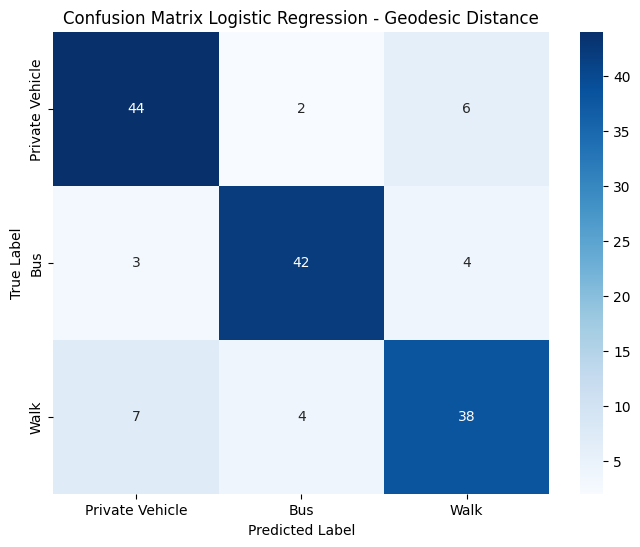

In [34]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

conf_matrix_log = confusion_matrix(y1_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression - Geodesic Distance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
coefficients = logreg_model.coef_

# Create a DataFrame to store the coefficients
coefficients_df = pd.DataFrame(coefficients, columns=X1.columns)

# Transpose the DataFrame for a more readable format
coefficients_df = coefficients_df.transpose()

# Display the coefficients table
print("Coefficients for each class:")
print(coefficients_df)

Coefficients for each class:
                          0         1         2
Gender            -0.224283  0.263532 -0.039249
Truck_licence      0.019113 -0.105493  0.086380
Bike_access       -0.264531  0.112880  0.151652
Skate_access      -0.320245 -0.185689  0.505934
Hsize             -0.041664 -0.062086  0.103750
Time              -1.014122  1.119546 -0.105424
Convenience        0.255972 -0.256620  0.000648
Cost              -0.150781  0.443180 -0.292399
Safety             0.228394  0.080477 -0.308871
Environment        0.165422 -0.107583 -0.057839
Health            -0.625054 -0.411816  1.036870
Weather           -0.113829 -0.587546  0.701375
Parking            0.300510 -0.255391 -0.045119
Geodesic_distance  1.226389 -0.530471 -0.695918


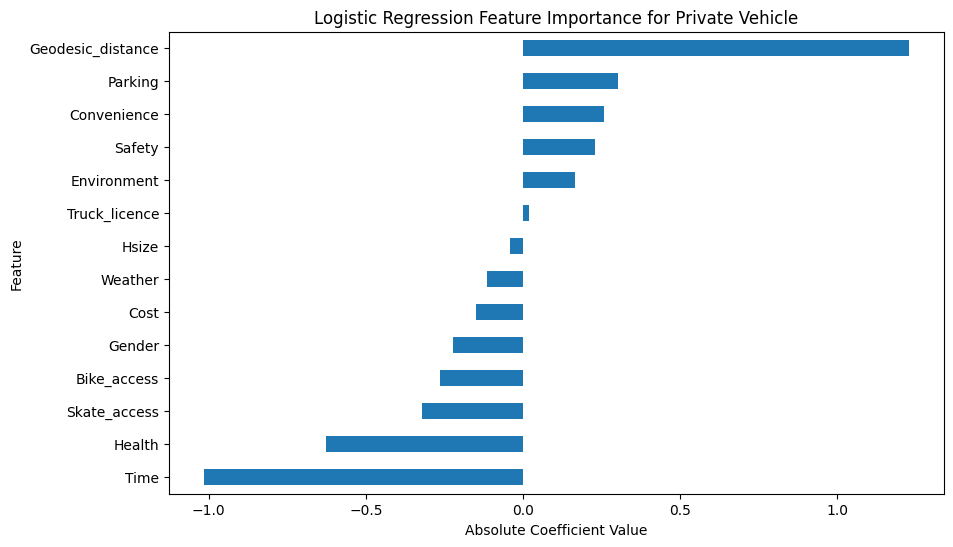

In [36]:
coefficients0 = pd.Series(logreg_model.coef_[0], index=X1.columns)

sorted_coefficients0 = coefficients0.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_coefficients0.plot(kind='barh')
plt.title('Logistic Regression Feature Importance for Private Vehicle')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

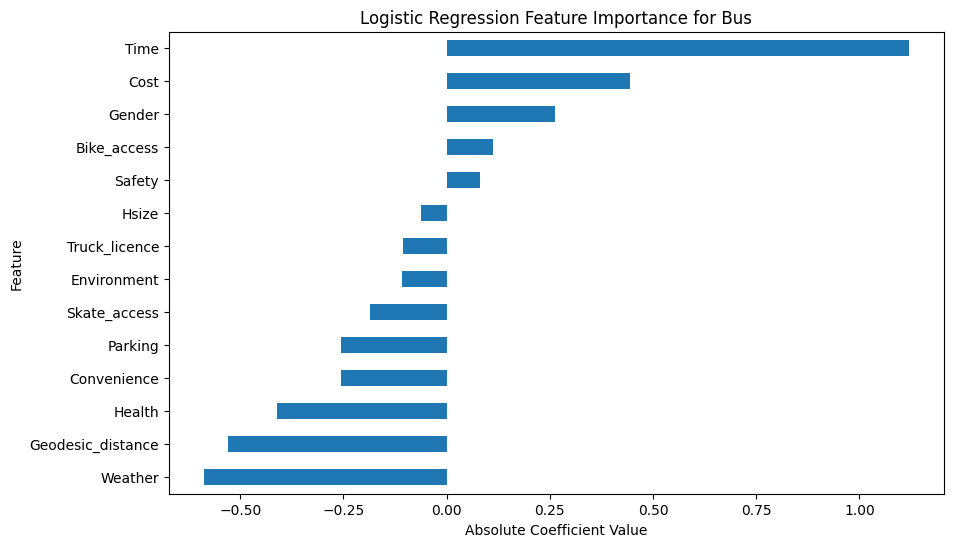

In [37]:
coefficients0 = pd.Series(logreg_model.coef_[1], index=X1.columns)

sorted_coefficients0 = coefficients0.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_coefficients0.plot(kind='barh')
plt.title('Logistic Regression Feature Importance for Bus')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

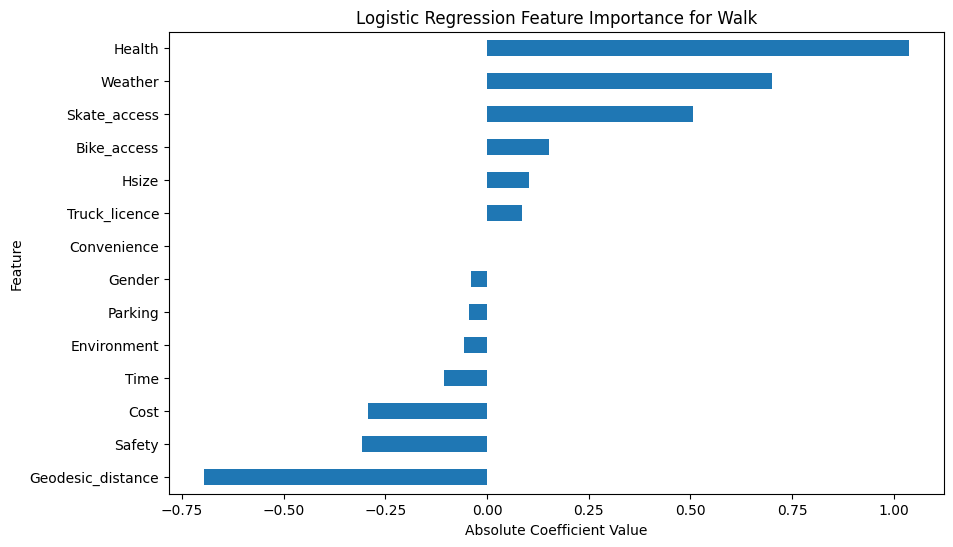

In [38]:
coefficients0 = pd.Series(logreg_model.coef_[2], index=X1.columns)

sorted_coefficients0 = coefficients0.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_coefficients0.plot(kind='barh')
plt.title('Logistic Regression Feature Importance for Walk')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Decision Tree

In [31]:
dt_model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [1, 2, 3, 4,  5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
}
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [32]:
bestp = grid_search_dt.best_params_
bestp

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [33]:
score = grid_search_dt.best_score_
score

0.7731601731601732

In [35]:
tree = grid_search_dt.best_estimator_
y_pred_tree = tree.predict(X_test)
tree_Report = classification_report(y_test, y_pred_tree)
print('Tree_Report:', tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        52
           1       0.61      0.73      0.67        49
           2       0.83      0.71      0.77        49

    accuracy                           0.72       150
   macro avg       0.73      0.72      0.72       150
weighted avg       0.73      0.72      0.72       150



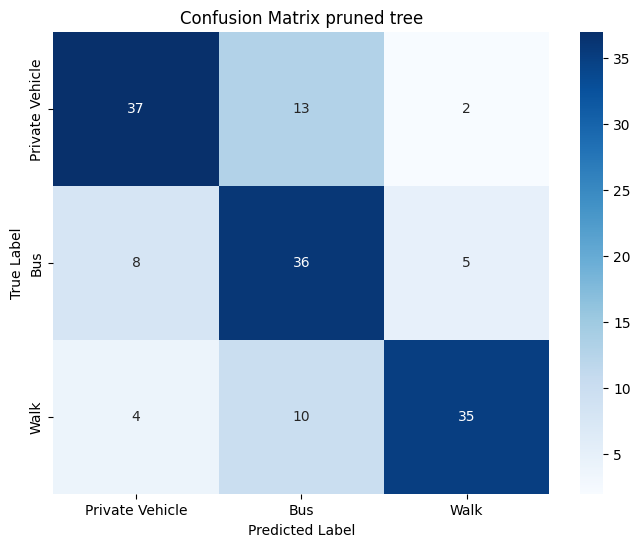

In [36]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
X.columns

Index(['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Geodesic_distance', 'Age_20 και κάτω',
       'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

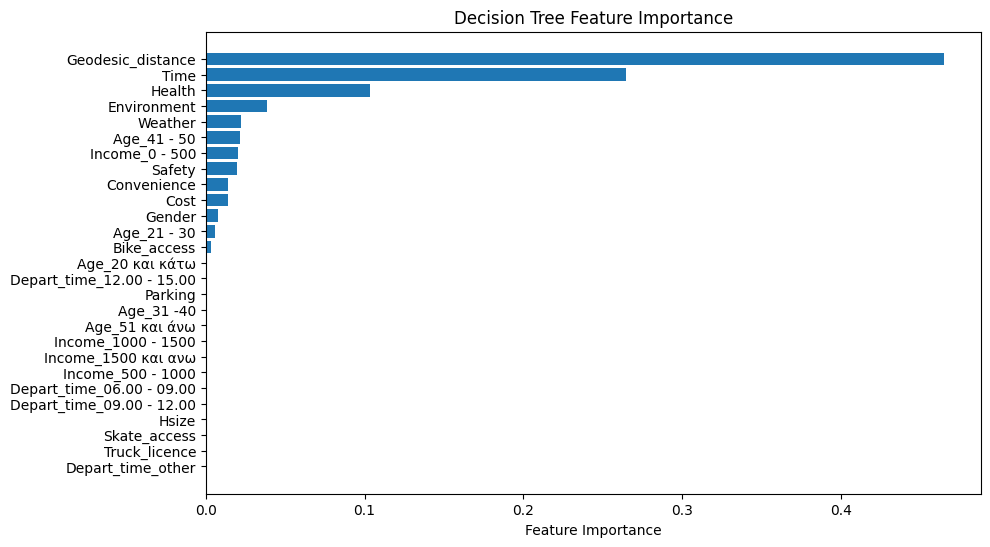

In [38]:
feature_importances = tree.feature_importances_

feature_names = ['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Geodesic_distance', 'Age_20 και κάτω',
       'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

# Random Forest

In [57]:
X_train.shape, X_test.shape

((216, 27), (150, 27))

In [59]:
y_pred_rf_basic = rf_model.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
confm = confusion_matrix(y_test, y_pred_rf_basic)
print(reportrfbasic)
print(confm)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        52
           1       0.88      0.76      0.81        49
           2       0.79      0.84      0.81        49

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150

[[43  3  6]
 [ 7 37  5]
 [ 6  2 41]]


In [60]:
param_grid = {
    'max_features': range(2, 28)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 7}


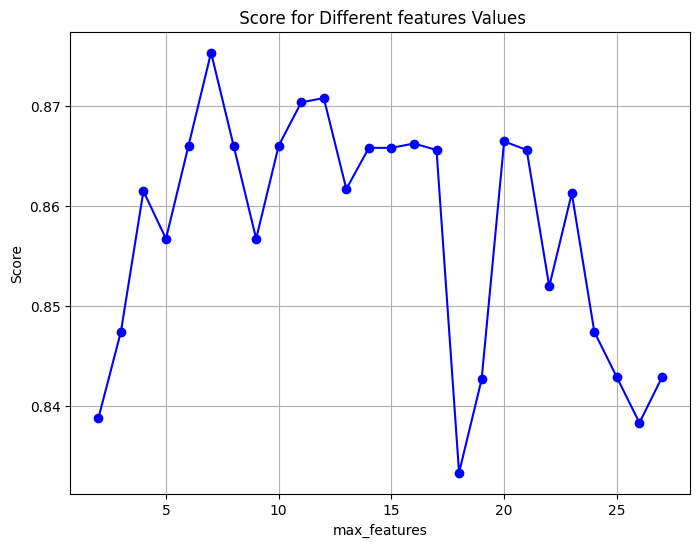

In [61]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [62]:
param_grid = {
    'n_estimators': list(range(50, 400))}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 219}


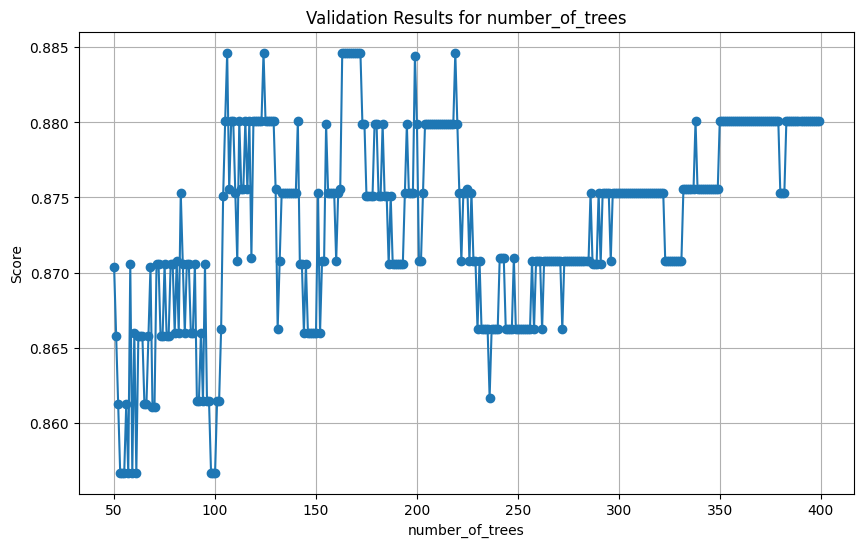

In [63]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [67]:
param_grid = {
    'n_estimators': list(range(100, 225)),
    'max_features': [6, 7, 8, 9, 10, 11, 12]}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 8, 'n_estimators': 152}


In [68]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        52
           1       0.90      0.88      0.89        49
           2       0.84      0.86      0.85        49

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



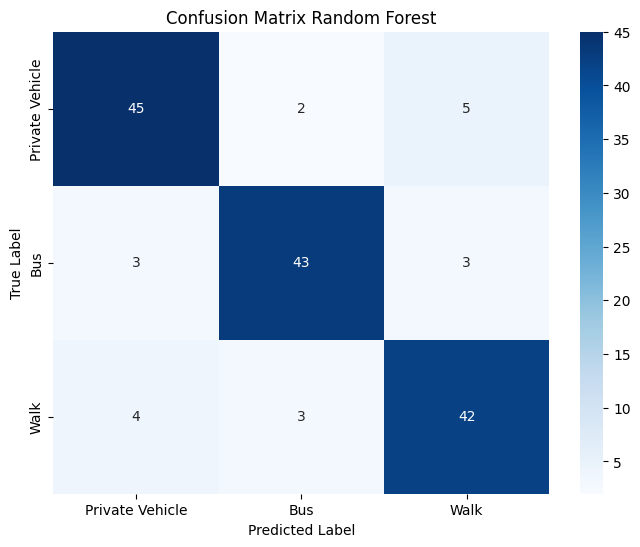

In [69]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [70]:
X.columns

Index(['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Geodesic_distance', 'Age_20 και κάτω',
       'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

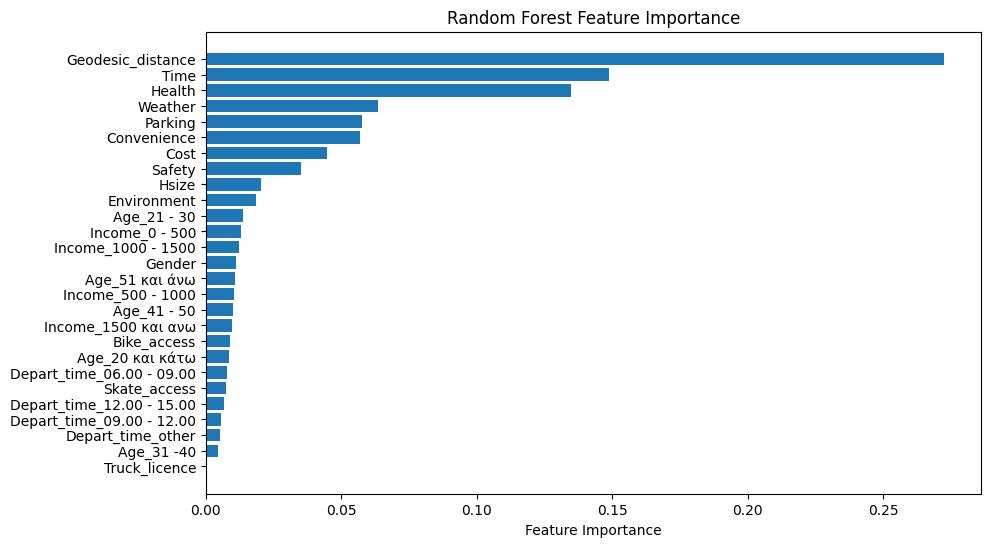

In [71]:
feature_importances = random_forest.feature_importances_

feature_names = ['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Geodesic_distance', 'Age_20 και κάτω',
       'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# XGBoost

In [21]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [82]:
param_grid = {
    'n_estimators': list(range(50, 400)),
}

In [83]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

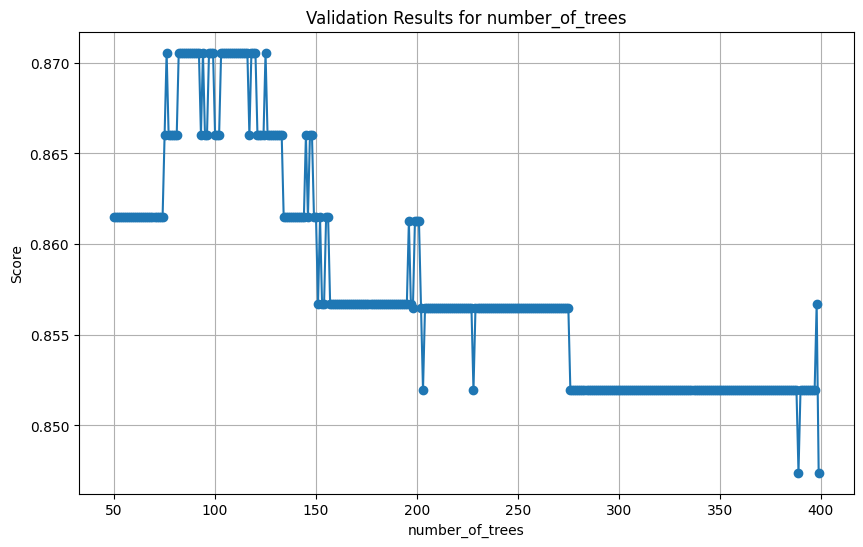

In [84]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [85]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [86]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

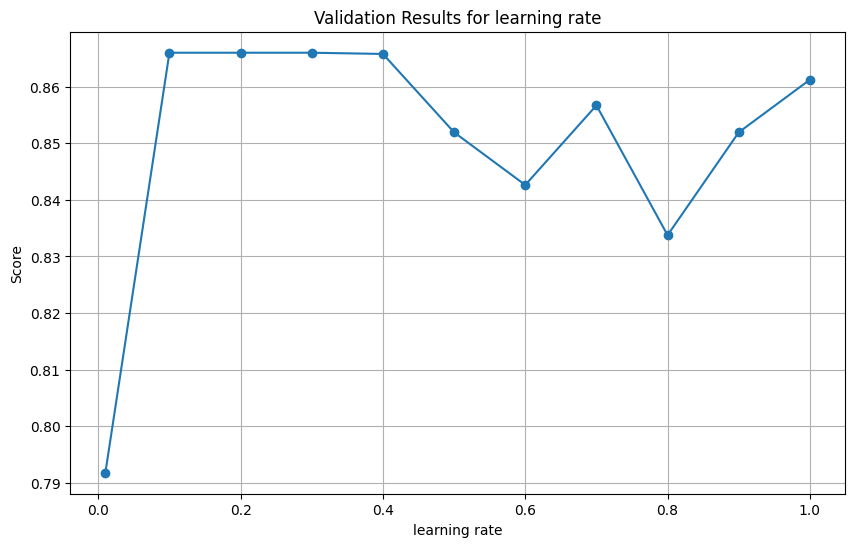

In [87]:
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Results for learning rate')
plt.grid(True)
plt.show()

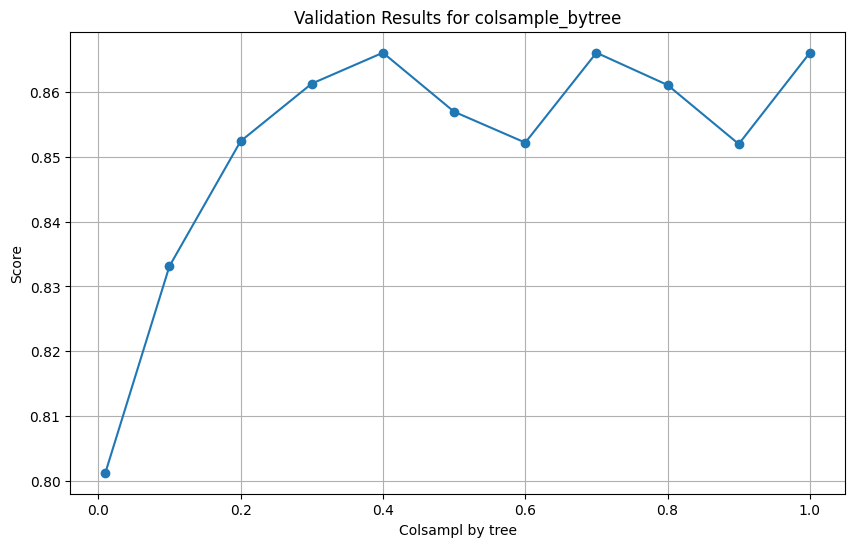

In [88]:
param_grid = {
    'colsample_bytree': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_colsample_bytree']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('Colsampl by tree')
plt.ylabel('Score')
plt.title('Validation Results for colsample_bytree')
plt.grid(True)
plt.show()

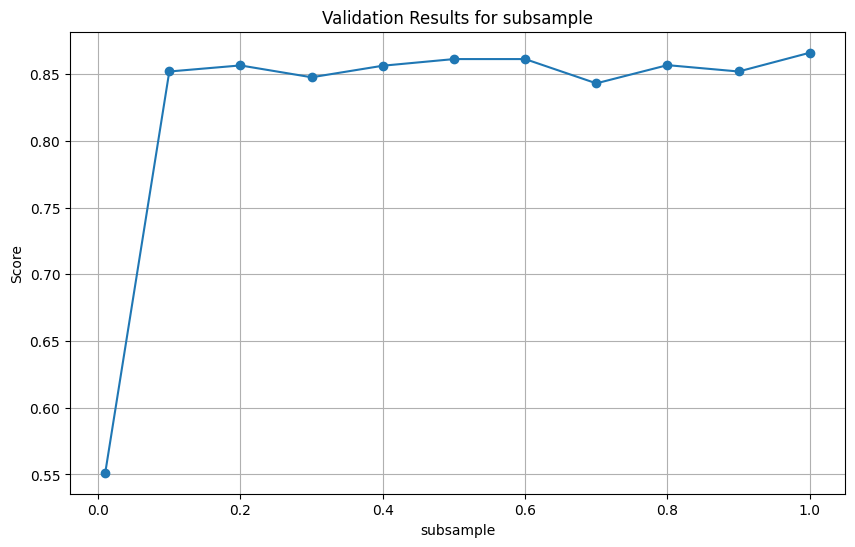

In [89]:
param_grid = {
    'subsample': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_subsample']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.title('Validation Results for subsample')
plt.grid(True)
plt.show()

In [22]:
param_grid = {
    'n_estimators': list(range(50, 150)),
    'subsample': [ 0.1, 0.2, 0.3, 0.4, 0.6],
    'colsample_bytree' : [0.4, 0.5, 0.6, 0.7],
    'learning_rate': [0.1, 0.2, 0.3, 0.4]}

In [23]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'n_estimators': 69, 'subsample': 0.4}


In [24]:
score = grid_search.best_score_
score

0.8987012987012987

In [25]:
best_model = grid_search.best_estimator_

In [26]:
y_pred_test = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        52
           1       0.91      0.80      0.85        49
           2       0.75      0.88      0.81        49

    accuracy                           0.84       150
   macro avg       0.85      0.84      0.84       150
weighted avg       0.85      0.84      0.84       150



In [27]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

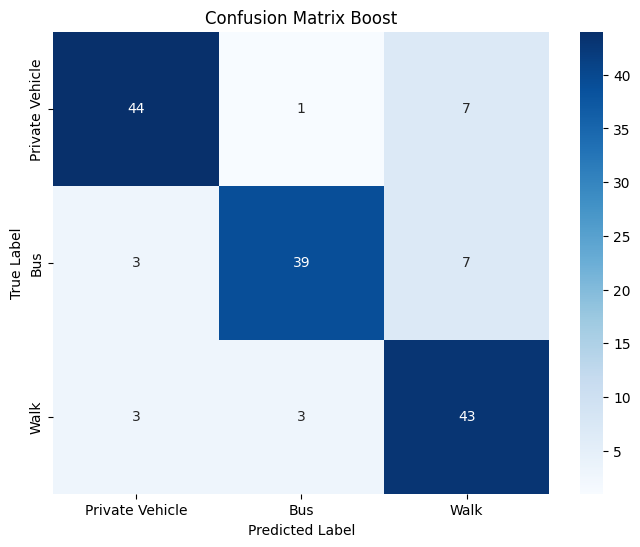

In [28]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

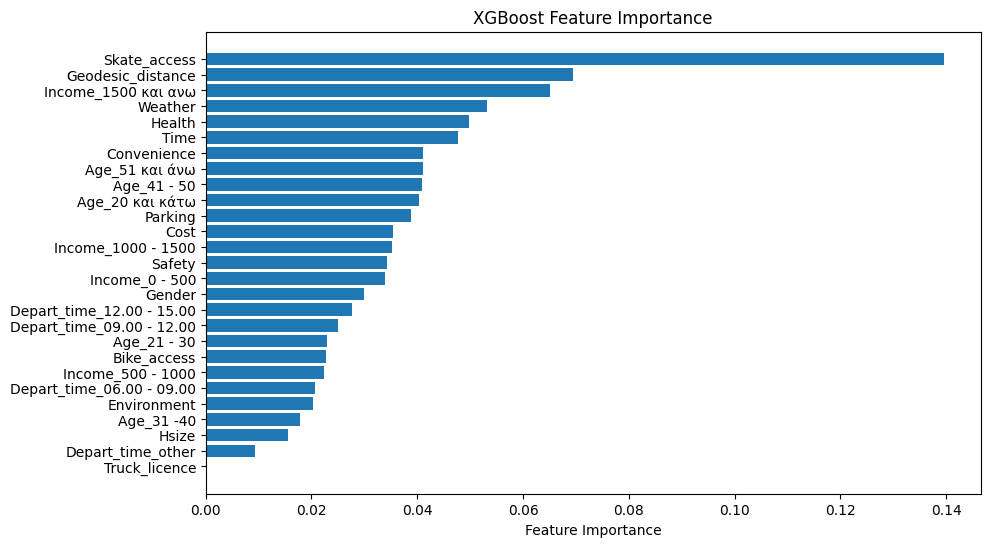

In [29]:
feature_importances = best_model.feature_importances_

feature_names = ['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Geodesic_distance', 'Age_20 και κάτω',
       'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()